In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
diabetes_df=pd.read_csv("diabetes.csv")
diabetes_df.head()

,Pregnancies,Gender,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,CalorieIntake,Exercise,SleepDuration
0,0,M,148,72,35,0,33.6,0.627,50,1,2508.3,No,6
1,1,F,85,66,29,0,26.6,0.351,31,0,2760.0,Evening,8
2,0,M,183,64,0,0,23.3,0.672,32,1,6480.0,Morning,8
3,1,F,89,66,23,94,28.1,0.167,21,0,NaN,Evening,8
4,0,M,137,40,35,168,43.1,2.288,33,1,1970.0,No,9


In [4]:
l1=[col  for col in diabetes_df.columns if col!="Outcome"]
l1.append("Outcome")

In [5]:
diabetes_df=diabetes_df[l1]
diabetes_df.head()

,Pregnancies,Gender,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,CalorieIntake,Exercise,SleepDuration,Outcome
0,0,M,148,72,35,0,33.6,0.627,50,2508.3,No,6,1
1,1,F,85,66,29,0,26.6,0.351,31,2760.0,Evening,8,0
2,0,M,183,64,0,0,23.3,0.672,32,6480.0,Morning,8,1
3,1,F,89,66,23,94,28.1,0.167,21,NaN,Evening,8,0
4,0,M,137,40,35,168,43.1,2.288,33,1970.0,No,9,1


In [6]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Gender                    768 non-null    object 
 2   Glucose                   768 non-null    int64  
 3   BloodPressure             768 non-null    int64  
 4   SkinThickness             768 non-null    int64  
 5   Insulin                   768 non-null    int64  
 6   BMI                       768 non-null    float64
 7   DiabetesPedigreeFunction  768 non-null    float64
 8   Age                       768 non-null    int64  
 9   CalorieIntake             753 non-null    float64
 10  Exercise                  768 non-null    object 
 11  SleepDuration             768 non-null    int64  
 12  Outcome                   768 non-null    int64  
dtypes: float64(3), int64(8), object(2)
memory usage: 78.1+ KB


##  Collection of Dataset Information


- Pregnancies:- How many Children birth By women
- Gender :- Male/Female
- Glucose :- Glucose Level increase then Diabetes chance decrease
- BloodPressure :- bpm increase then diabetes chance increase
- Skinthickness :- fatty acid
- insulin :- if insulin increase diabetes decrease
- DiabetesPedigreeFunction :- Famliy History diabetes 100% how many family member suffer form diabetes
- Bmi  -: overweighted person have high chance for diabetes
- CalorieIntake :- per day how many calorieIntake
- Exercise :- Exercise Matter 



## Data Clean


In [7]:
diabetes_df["Exercise"]=diabetes_df["Exercise"].replace({"No":1,"Evening":2,"Morning":3,"Both":4}).astype(int)
diabetes_df["Gender"]=diabetes_df["Gender"].replace({"M":1,"F":0}).astype(int)


array([[<AxesSubplot:title={'center':'CalorieIntake'}>]], dtype=object)

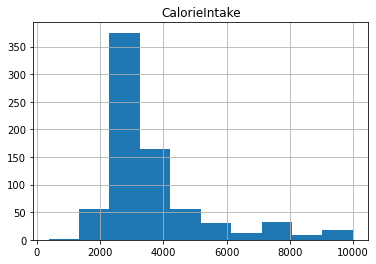

In [8]:
diabetes_df.hist("CalorieIntake")

In [9]:
diabetes_df["CalorieIntake"].fillna(diabetes_df["CalorieIntake"].median(),inplace=True)

In [10]:
diabetes_df.head()

,Pregnancies,Gender,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,CalorieIntake,Exercise,SleepDuration,Outcome
0,0,1,148,72,35,0,33.6,0.627,50,2508.3,1,6,1
1,1,0,85,66,29,0,26.6,0.351,31,2760.0,2,8,0
2,0,1,183,64,0,0,23.3,0.672,32,6480.0,3,8,1
3,1,0,89,66,23,94,28.1,0.167,21,2893.0,2,8,0
4,0,1,137,40,35,168,43.1,2.288,33,1970.0,1,9,1


In [11]:
diabetes_df["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

## Make balance dataset

In [12]:
X=diabetes_df.iloc[:,:-1]
y=diabetes_df.iloc[:,-1]

In [13]:
from imblearn.under_sampling import RandomUnderSampler
b=RandomUnderSampler(sampling_strategy=1)
X_1,y_1=b.fit_resample(X,y)


In [14]:
y_1.value_counts()

1    268
0    268
Name: Outcome, dtype: int64

In [15]:
X_1.shape

(536, 12)

In [16]:
X_1["Outcome"]=y_1

In [17]:
X_1.shape

(536, 13)

In [18]:
X_1["Outcome"].value_counts()

1    268
0    268
Name: Outcome, dtype: int64

In [19]:
X_1.head()

,Pregnancies,Gender,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,CalorieIntake,Exercise,SleepDuration,Outcome
0,1,0,82,64,13,95,21.2,0.415,23,2893.0,3,8,0
1,2,0,99,52,15,94,24.6,0.637,21,2504.0,3,7,0
2,1,0,92,62,25,41,19.5,0.482,25,2733.0,3,8,0
3,3,0,96,56,34,115,24.7,0.944,39,2770.0,3,6,0
4,0,0,105,0,0,0,0.0,0.305,24,2853.0,3,7,0


In [20]:
diabetes_df=X_1

## Feature Selection start 

In [21]:
category_feature=[]
continues_feature=[]
for j,i in zip(diabetes_df.columns[:-1],diabetes_df.nunique()):
    if (i/diabetes_df.shape[0])>0.06:
        
        continues_feature.append(j)
    else:
        print(j,i)
        category_feature.append(j)
        
category_feature.append("Outcome")
continues_feature.append("Outcome")
    
    


Pregnancies 6
Gender 2
Exercise 4
SleepDuration 12


In [22]:
category_feature,continues_feature

(['Pregnancies', 'Gender', 'Exercise', 'SleepDuration', 'Outcome'],
 ['Glucose',
  'BloodPressure',
  'SkinThickness',
  'Insulin',
  'BMI',
  'DiabetesPedigreeFunction',
  'Age',
  'CalorieIntake',
  'Outcome'])

### Selection of Category Feature  

#### method 1 : Cramer's V test

In [23]:
category_feature

['Pregnancies', 'Gender', 'Exercise', 'SleepDuration', 'Outcome']

In [24]:
# import FisherExactTest

import scipy.stats as st 
df=pd.DataFrame(columns=category_feature,index=category_feature)
m = np.array([[4,4],[4,5],[10,6]])

for j in category_feature:
    l1=[]
    for i in category_feature:
        df_t=pd.crosstab(diabetes_df[i],diabetes_df[j])
        stat, p, dof, expected = st.chi2_contingency(df_t,correction=True)

        x=np.ndarray.flatten(expected)
        y=x<5
#         if True in y or p<0.05: 
# #             print(i,p) ## failed chi squrared test but their is no module for fisher exact test 
#             # but here p-value<0.05  is small so we can select this feature.
#             ## 
#             l1.append(p)
#         else:
        t=min(df_t.shape)-1
        deno=sum(df_t.sum())
        x=np.sqrt(stat / deno)
        l1.append(x)
    df.loc[:,j]=pd.Series(l1,index=category_feature)
    
## Here we can see all categotry feature relavent for Our Outcome variable 

In [25]:
# df.style.apply(lambda x: ["background: red" if v>1.980848e-119 else "" for v in x], axis = 1)
df.head()

,Pregnancies,Gender,Exercise,SleepDuration,Outcome
Pregnancies,2.236068,0.884452,0.251580,1.655795,0.251263
Gender,0.884452,0.995745,0.105005,0.238971,0.131488
Exercise,0.251580,0.105005,1.732051,0.547907,0.823695
SleepDuration,1.655795,0.238971,0.547907,3.316625,0.602617
Outcome,0.251263,0.131488,0.823695,0.602617,0.996269


<b> Here we can see all categotry feature relavent for Our Outcome variable </b>
<br>
<b> Note : </b> Here we know the intra relationship between sleep duration and exercise  but we need to take both mesaurements
          for checking good body health

### Selection of Continues variable 

In [26]:
continues_feature

['Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'CalorieIntake',
 'Outcome']

In [27]:
continue_diabetes_feature_df=diabetes_df[continues_feature]
continue_diabetes_feature_df

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,CalorieIntake,Outcome
0,82,64,13,95,21.2,0.415,23,2893.0,0
1,99,52,15,94,24.6,0.637,21,2504.0,0
2,92,62,25,41,19.5,0.482,25,2733.0,0
3,96,56,34,115,24.7,0.944,39,2770.0,0
4,105,0,0,0,0.0,0.305,24,2853.0,0
...,...,...,...,...,...,...,...,...,...
531,128,88,39,110,36.5,1.057,37,5720.0,1
532,123,72,0,0,36.3,0.258,52,4140.0,1
533,190,92,0,0,35.5,0.278,66,1970.0,1
534,170,74,31,0,44.0,0.403,43,4340.0,1


In [28]:
for c,i,j in zip(continue_diabetes_feature_df.columns,continue_diabetes_feature_df.skew(),continue_diabetes_feature_df.kurtosis()):
    print(c,i,j)


Glucose -0.03970763713101335 0.6760785409428443
BloodPressure -1.812305900071165 4.783279661041938
SkinThickness 0.1436980450217598 -0.41733583558524545
Insulin 2.117257386449877 6.194898830937991
BMI -0.3902835560727809 3.4644161206214896
DiabetesPedigreeFunction 1.8010185613201584 4.84602575933598
Age 1.0165687983831981 0.5111534945248142
CalorieIntake 1.5284558617894968 1.7870267021039092
Outcome 0.0 -2.00750469043152


### Anova test

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_scal=sc.fit_transform(X_1[continues_feature].iloc[:,:-1])
y_scal=X_1[continues_feature].iloc[:,-1]
X_train,X_test,y_train,y_test=train_test_split(X_scal,y_scal)

In [30]:
from random import sample


def sample_dist(X1, X2):
    l1 = []
    l2 = []
    X1=list(X1)
    X2=list(X2)
    for i in range(0, 68):
        mean_x1 = np.mean(sample(X1, 20))
        mean_x2 = np.mean(sample(X2, 20))
        
        l1.append(mean_x1)
        l2.append(mean_x2)
    return (l1,l2)

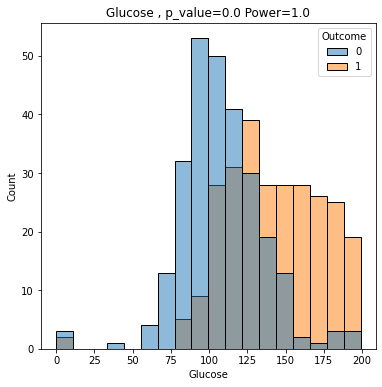

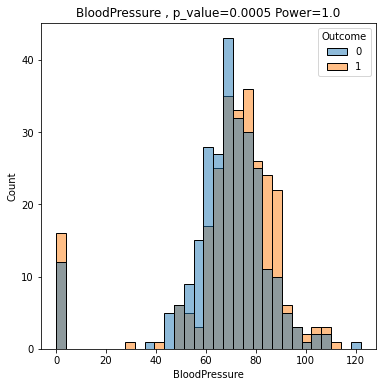

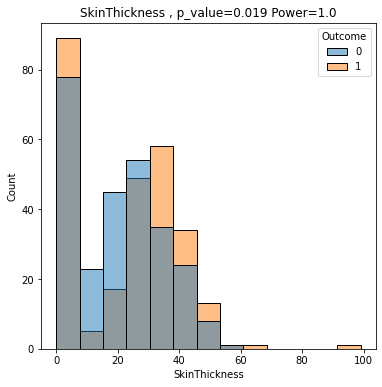

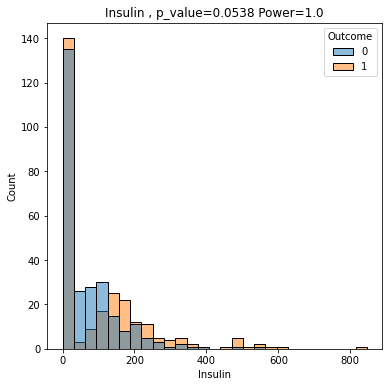

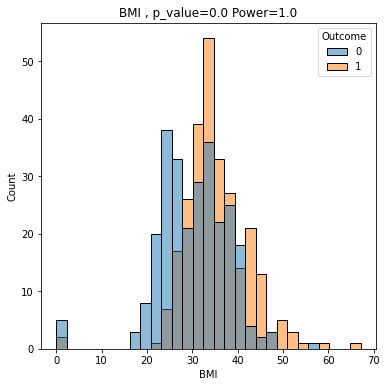

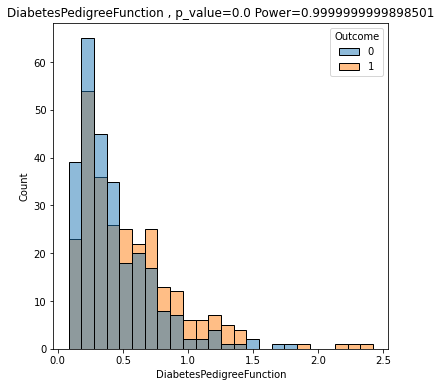

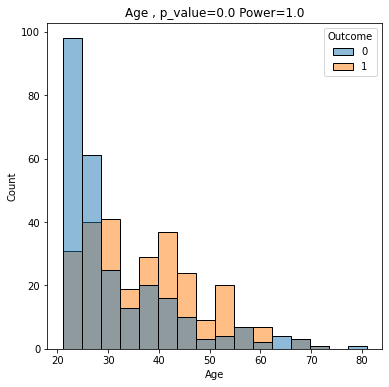

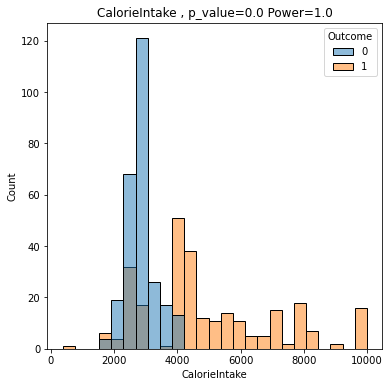

In [31]:

for i in continue_diabetes_feature_df.columns:
    from math import sqrt
    from statsmodels.stats.power import FTestAnovaPower
    if  i !="Outcome":
        n=0
        fig=plt.figure(figsize=(6,6))
        X0=continue_diabetes_feature_df[continue_diabetes_feature_df["Outcome"]==0][i]

        X1=continue_diabetes_feature_df[continue_diabetes_feature_df["Outcome"]==1][i]
#         X=sample_dist(X0,X1)
#         X0=X[0]
#         X1=X[1]
#         n1=len(X[0])
#         n2=len(X[1])
        n1=len(X0)
        n2=len(X1)
       
        s1=np.std(X0)
        s2=np.std(X1)
        u1=np.mean(X0)
        u2=np.mean(X1)
        
        s = sqrt(((n1 - 1) * s1 + (n2 - 1) * s2) / (n1 + n2 - 2))
        d=u1-u2/s 
        alpha=0.05
        power=0.8
#         print(d)
        obj = FTestAnovaPower()
        n   = obj.solve_power(effect_size=d,alpha=alpha,nobs=n1)

        
        F,p_value=st.kruskal(X0,X1) 

        bbox = fig.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
        width, height = bbox.width, bbox.height
        

        sns.histplot(data=continue_diabetes_feature_df,x=continue_diabetes_feature_df[i],hue="Outcome")
#         sns.histplot(x=X0,color="blue")
#         sns.histplot(x=X1,color="red")
       
        plt.title(i+" , "+"p_value="+str(round(p_value,4))+" Power="+str(n))

    
    
    
  
    
   


<b style="font-size:16px"> Almost all the columns follow normal distributed </b>

In [32]:
from sklearn.feature_selection import SelectKBest, chi2,f_classif,f_oneway
def select_features(X_train, y_train, X_test):
    fs = SelectKBest(score_func=f_classif, k='all')
    fs.fit(X_train, y_train)

    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

In [33]:
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
fs.scores_,

(array([127.2604934 ,   1.11228762,   4.27501151,  12.48733051,
         43.90828158,  20.34106461,  30.2672429 , 185.78309373]),)

In [34]:
len(continues_feature)

9

In [35]:
fs_feature=pd.DataFrame({'Feature':continues_feature[:-1],"fs":fs.scores_,"fs_p":fs.pvalues_})
fs_feature=fs_feature.sort_values(by="fs_p",ascending=True)
fs_feature

,Feature,fs,fs_p
7,CalorieIntake,185.783094,5.156318e-35
0,Glucose,127.260493,8.183221e-26
4,BMI,43.908282,1.114346e-10
6,Age,30.267243,6.731296e-08
5,DiabetesPedigreeFunction,20.341065,8.526262e-06
3,Insulin,12.487331,4.575793e-04
2,SkinThickness,4.275012,3.931925e-02
1,BloodPressure,1.112288,2.922218e-01


C:\Users\nikhil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


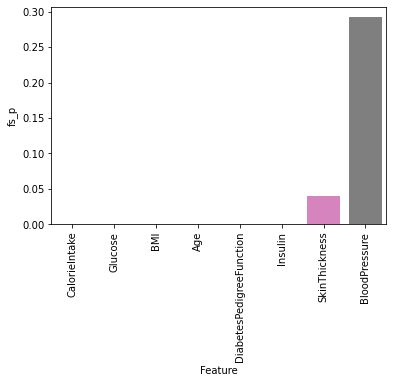

In [36]:
sns.barplot(fs_feature['Feature'], fs_feature['fs_p'])
plt.xticks(rotation=90);
plt.show()

## Now it's time to visualiaze data in 2d plot 

In [37]:
import atoti as tt

session = tt.create_session()

In [38]:
df = session.read_csv("diabetes.csv")

In [39]:
df.head()

,Pregnancies,Gender,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,CalorieIntake,Exercise,SleepDuration
0,0,M,148,72,35,0,33.6,0.627,50,1,2508.3,No,6
1,1,F,85,66,29,0,26.6,0.351,31,0,2760.0,Evening,8
2,0,M,183,64,0,0,23.3,0.672,32,1,6480.0,Morning,8
3,1,F,89,66,23,94,28.1,0.167,21,0,NaN,Evening,8
4,0,M,137,40,35,168,43.1,2.288,33,1,1970.0,No,9


In [40]:
cube = session.create_cube(df)

In [41]:
h = cube.hierarchies
h

Hierarchies()

In [42]:
session.url

'http://localhost:57112'

In [43]:
import dtale

d=dtale.show(diabetes_df)

In [44]:
import seaborn as sns


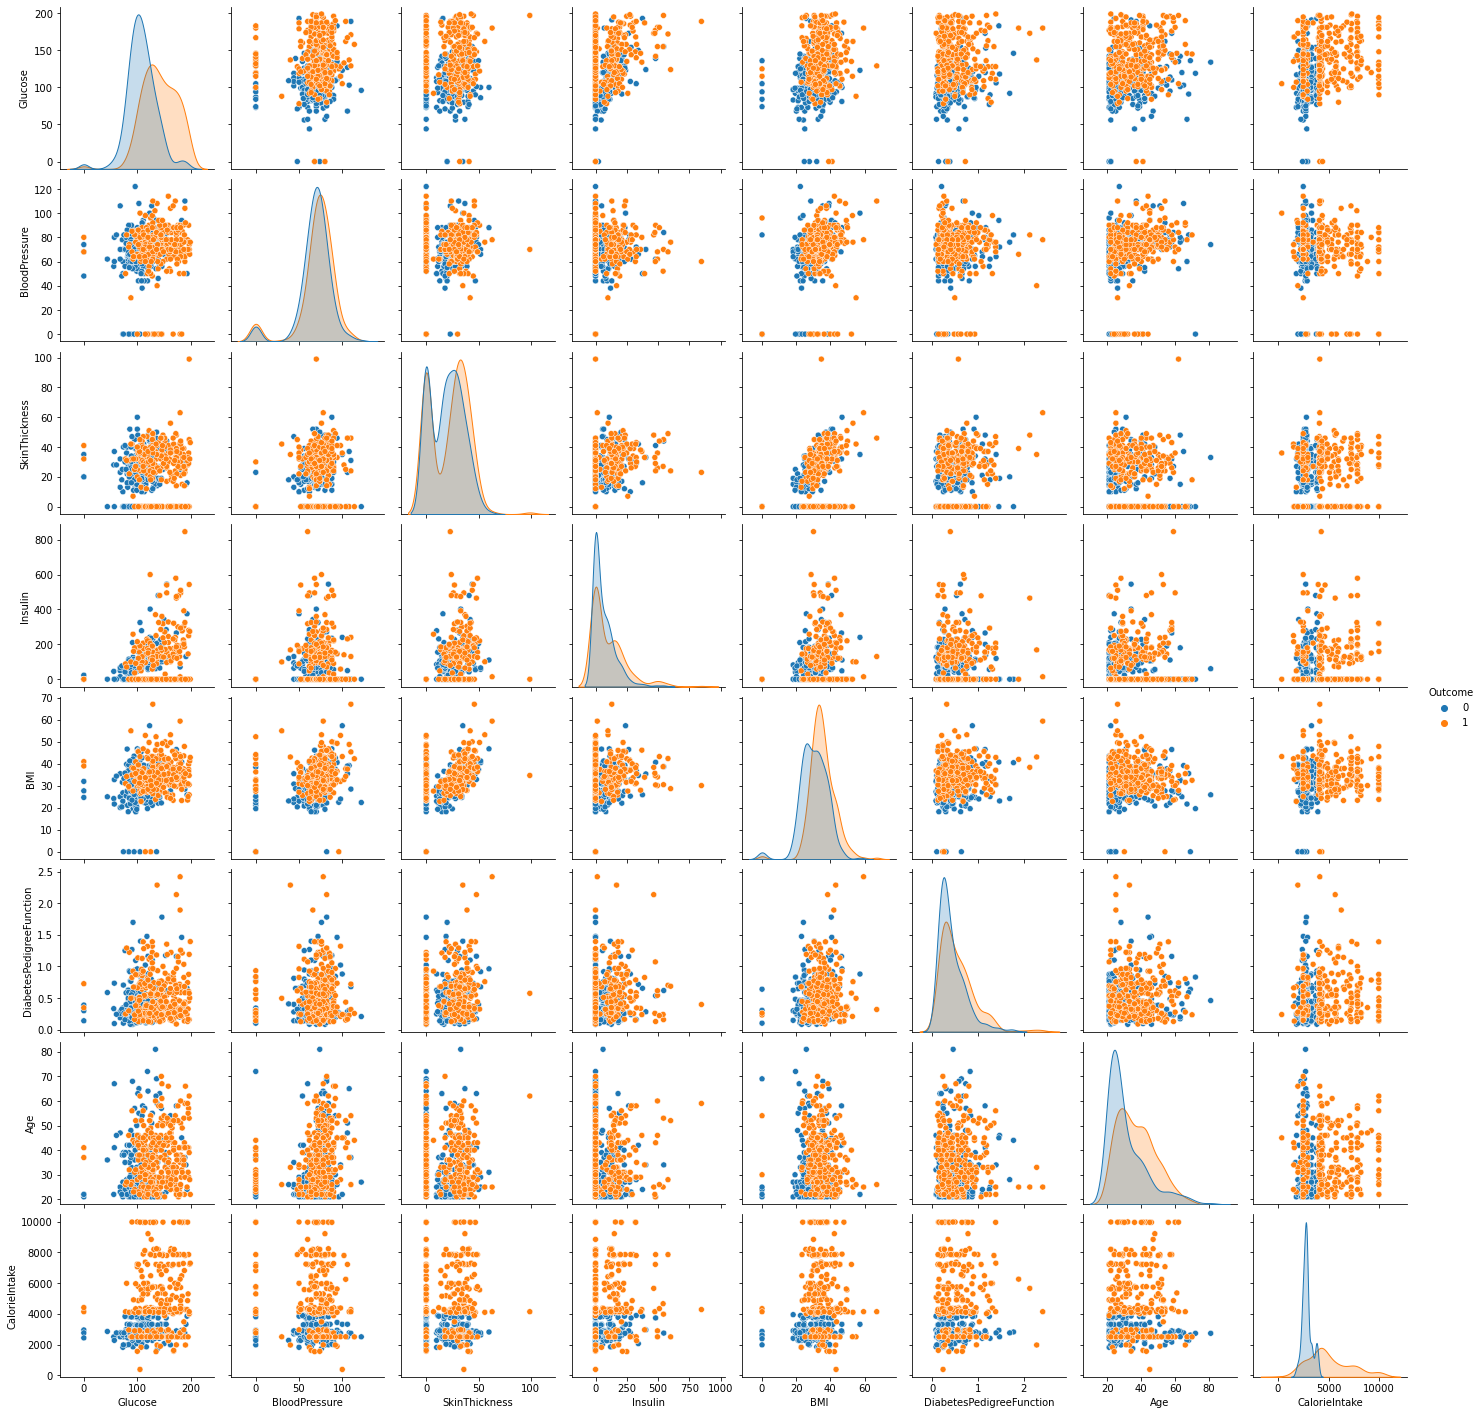

Executing shutdown due to inactivity...


2021-05-23 17:07:09,213 - INFO     - Executing shutdown due to inactivity...


Executing shutdown...


2021-05-23 17:07:21,633 - INFO     - Executing shutdown...


In [45]:
sns.pairplot(continue_diabetes_feature_df,hue="Outcome")
